<a href="https://colab.research.google.com/github/Joma-mo/Eight-queens-problem/blob/main/eight_queens_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libs

In [91]:
import matplotlib.pyplot as plt
import random

In [92]:
NUM_QUEENS = 8
POPULATION_SIZE = 10
MUTATION_RATE = 0.05

### Create Individual

In [93]:
def create_individual():
    # TODO: create a random chromosome
    return [random.randint(0, 7) for _ in range(8)]
print(create_individual())

[7, 5, 6, 2, 7, 5, 7, 2]


### Generate Population

In [94]:
def generate_population(population_size:int = 20):
    population = []

    for _ in range(population_size):
        new_individual = create_individual()
        population.append(new_individual)

    return population

### Parent Selection

In [95]:
from scipy import special as sc

def parent_selection(population):
    parents = []
    #TODO: choose the pairs of parents

    for ind in population:
        #select parents with probability proportional to their fitness score
        if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):
            parents.append(ind)


    return parents

### Next Generation Selection

In [96]:
#evolution
def next_generation_selection(children_population):
    next_generation = []
    #TODO: choose the next_generation
    #select individuals to become parents
    parents = parent_selection(population)

    #recombination. Create new offsprings
    offsprings = crossover(parents)

    #mutation
    offsprings = list(map(mutate, offsprings))

    #introduce top-scoring individuals from previous generation and keep top fitness individuals
    next_generation = offsprings

    for ind in population:
        next_generation.append(ind)

    next_generation = sorted(next_generation, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]

    return next_generation

### Crossover

In [97]:
def crossover(parents):
    offsprings = []
    crossover_rate = 0.8
    for i in range(0, len(parents)-1, 2):
        parent1 = parents[i]
        parent2 = parents[i + 1]
        if random.random() < crossover_rate:
            crossover_point = random.randint(1, len(parent1) - 1)
            offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
            offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
            offsprings.append(offspring1)
            offsprings.append(offspring2)
        else:
            offsprings.append(parent1)
            offsprings.append(parent2)
    return offsprings

### Mutation

In [98]:
def mutate(seq):
    #TODO: implement mutate
    for row in range(len(seq)):
        if random.random() < MUTATION_RATE:
            seq[row] = random.randrange(NUM_QUEENS)

    return seq

### Score Function

In [99]:
def fitness_score(seq):
    fit_score = 0
    #TODO: calculate fitness score
    for row in range(NUM_QUEENS):
        col = seq[row]

        for other_row in range(NUM_QUEENS):

            #queens cannot pair with itself
            if other_row == row:
                continue
            if seq[other_row] == col:
                continue
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            #score++ if every pair of queens are non-attacking.
            fit_score += 1

    #divide by 2 as pairs of queens are commutative
    return fit_score/2


## Calculate Population Fitness

In [100]:
def population_fitness_func(population):
    population_fitness = 0
    individuals_fitnesses:dict = {}
    for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        population_fitness += fitness_sc
        individuals_fitnesses[tuple(chromosome)] = fitness_sc
    return individuals_fitnesses ,population_fitness


### Termination Condition

In [101]:
def check_end(population, to_print=True) -> bool:
    #TODO: check end of algorithm
    for ind in population:
        score = fitness_score(ind)
        if to_print:
            print(f'{ind}. Score: {score}')
        if score == sc.comb(NUM_QUEENS, 2):
            if to_print:
                print('Solution found')
            return True

    if to_print:
        print('Solution not found')
    return False

### Run Your Algorithms

In [102]:
# The genetic algorithm
generation = 0
solution_is_found = False
fitness = []

population = generate_population()
individuals_fitnesses , population_fitness = population_fitness_func(population)

while not check_end(population):
    # TODO: this is a default setup which you maybe need to change.
    print(f'Generation: {generation}')
    population = next_generation_selection(population)
    individuals_fitnesses , population_fitness = population_fitness_func(population)

    generation += 1
    avg_fit = population_fitness / len(population)
    fitness.append(avg_fit)

[7, 2, 7, 3, 4, 3, 5, 6]. Score: 23.0
[1, 4, 1, 1, 4, 3, 0, 3]. Score: 21.0
[7, 5, 7, 5, 4, 2, 5, 4]. Score: 19.0
[6, 7, 0, 4, 6, 5, 4, 3]. Score: 18.0
[6, 6, 1, 2, 2, 1, 7, 0]. Score: 20.0
[1, 7, 6, 7, 7, 1, 3, 0]. Score: 22.0
[2, 2, 5, 6, 1, 0, 2, 7]. Score: 23.0
[3, 1, 3, 0, 2, 6, 4, 1]. Score: 23.0
[7, 7, 3, 5, 4, 4, 3, 0]. Score: 20.0
[1, 1, 4, 2, 0, 5, 6, 3]. Score: 22.0
[5, 7, 3, 7, 3, 6, 3, 5]. Score: 21.0
[5, 2, 3, 3, 7, 4, 5, 0]. Score: 22.0
[1, 5, 1, 0, 4, 0, 1, 7]. Score: 21.0
[4, 7, 1, 7, 0, 4, 7, 2]. Score: 20.0
[3, 0, 4, 6, 7, 5, 5, 3]. Score: 20.0
[7, 1, 3, 0, 0, 0, 5, 7]. Score: 22.0
[3, 3, 7, 5, 5, 3, 5, 5]. Score: 15.0
[0, 5, 4, 1, 6, 0, 6, 5]. Score: 20.0
[2, 1, 4, 5, 5, 5, 0, 1]. Score: 16.0
[5, 7, 1, 2, 2, 5, 1, 6]. Score: 21.0
Solution not found
Generation: 0
[6, 7, 0, 4, 6, 1, 3, 0]. Score: 23.0
[7, 2, 7, 3, 4, 3, 5, 6]. Score: 23.0
[2, 2, 5, 6, 1, 0, 2, 7]. Score: 23.0
[3, 1, 3, 0, 2, 6, 4, 1]. Score: 23.0
[3, 0, 4, 6, 7, 5, 0, 1]. Score: 22.0
[1, 7, 6, 7, 7, 1

<ipython-input-95-660ecb1e6810>:9: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  if random.randrange(sc.comb(NUM_QUEENS, 2)*2) < fitness_score(ind):



[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[7, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 4, 7, 3, 6, 1, 5, 0]. Score: 25.0
[5, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
[1, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 4, 7, 3, 6, 1, 5, 0]. Score: 25.0
[5, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
Solution not found
Generation: 33
[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[4, 2, 7, 6, 6, 1, 5, 0]. Score: 26.0
[7, 4, 7, 3, 6, 1, 5, 0]. Score: 25.0
[4, 1, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 4, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 4, 7, 3, 6, 1, 5, 0]. Score: 25.0
[5, 2, 7, 3, 6, 1, 5, 0]. Score: 25.0
Solution not found
Generation: 34
[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[4, 2, 7, 3, 6, 1, 5, 0]. Score: 27.0
[4, 2, 7, 6, 6, 1, 5, 0]. Score: 26.0
[7, 4, 7, 3, 6, 1, 5, 0]. Score: 25.0
[7, 2, 7, 3, 6, 1, 

### See Your Progress Over Generations

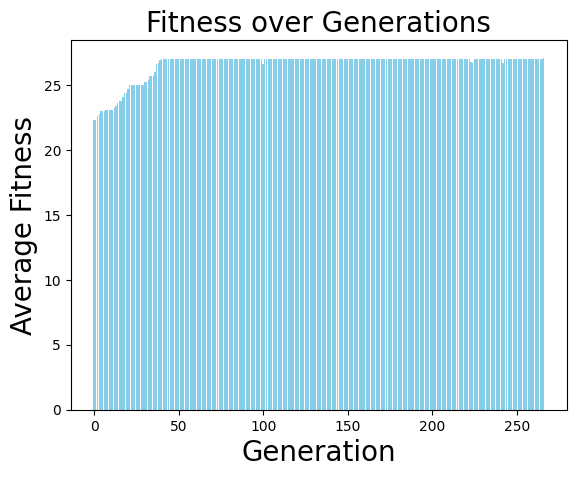

In [103]:
plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()